In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:
#Q1_coverting to data frame
iris = pd.read_csv("C:/Users/acer/Desktop/HW2_9823033/Iris.csv")
#print(iris)
titanic=pd.read_csv("C:/Users/acer/Desktop/HW2_9823033/titanic.csv")
print(titanic)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0    150 non-null    int64
 1   Class         150 non-null    int64
 2   Petal length  150 non-null    int64
 3   Sepal length  150 non-null    int64
 4   Sepal width   150 non-null    int64
 5   Petal width   150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [5]:
iris.head(10)

,Unnamed: 0,Class,Petal length,Sepal length,Sepal width,Petal width
0,0,1,51,35,14,2
1,1,1,49,30,14,2
2,2,1,47,32,13,2
3,3,1,46,31,15,2
4,4,1,50,36,14,2
5,5,1,54,39,17,4
6,6,1,46,34,14,3
7,7,1,50,34,15,2
8,8,1,44,29,14,2
9,9,1,49,31,15,1


In [6]:
iris.drop("Unnamed: 0",axis=1,inplace=True)
x=iris.drop('Class',axis=1)

In [7]:
x.head(10)

,Petal length,Sepal length,Sepal width,Petal width
0,51,35,14,2
1,49,30,14,2
2,47,32,13,2
3,46,31,15,2
4,50,36,14,2
5,54,39,17,4
6,46,34,14,3
7,50,34,15,2
8,44,29,14,2
9,49,31,15,1


In [8]:
Y=iris['Class']

In [9]:
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.3)
print(x_train.shape,x_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [10]:
classifier=neighbors.KNeighborsClassifier()

In [11]:
classifier.fit(x_train,Y_train)
pr=classifier.predict(x_test)

In [12]:
acc=accuracy_score(Y_test,pr)
print(acc)

0.9555555555555556


In [13]:
titanic.dropna()
cabins=titanic.loc[:,['Cabin']]
print(cabins)

    Cabin
0     NaN
1     C85
2     NaN
3    C123
4     NaN
..    ...
886   NaN
887   B42
888   NaN
889  C148
890   NaN

[891 rows x 1 columns]


In [14]:
arr_cabin=array(cabins)
print(arr_cabin)

[[nan]
 ['C85']
 [nan]
 ['C123']
 [nan]
 [nan]
 ['E46']
 [nan]
 [nan]
 [nan]
 ['G6']
 ['C103']
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 ['D56']
 [nan]
 ['A6']
 [nan]
 [nan]
 [nan]
 ['C23 C25 C27']
 [nan]
 [nan]
 [nan]
 ['B78']
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 ['D33']
 [nan]
 ['B30']
 ['C52']
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 ['B28']
 ['C83']
 [nan]
 [nan]
 [nan]
 ['F33']
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 ['F G73']
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 ['C23 C25 C27']
 [nan]
 [nan]
 [nan]
 ['E31']
 [nan]
 [nan]
 [nan]
 ['A5']
 ['D10 D12']
 [nan]
 [nan]
 [nan]
 [nan]
 ['D26']
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 ['C110']
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 ['B58 B60']
 [nan]
 [nan]
 [nan]
 [nan]
 ['E101']
 ['D26']
 [nan]
 [nan]
 [nan]
 ['F E69']
 [nan]
 [nan]
 [

In [15]:
label_enconder=LabelEncoder()
integer_encoded=label_enconder.fit_transform(arr_cabin)
print(integer_encoded)

onehot_encoder=OneHotEncoder(sparse=False)
integer_encoded=integer_encoded.reshape(len(integer_encoded),1)
onehot_encoded=onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[147  81 147  55 147 147 129 147 147 147 145  49 147 147 147 147 147 147
 147 147 147 111 147  13 147 147 147  63 147 147 147  41 147 147 147 147
 147 147 147 147 147 147 147 147 147 147 147 147 147 147 147 147 101 147
  23  71 147 147 147 147 147  21  80 147 147 147 142 147 147 147 147 147
 147 147 147 140 147 147 147 147 147 147 147 147 147 147 147 147  63 147
 147 147 122 147 147 147  12  91 147 147 147 147  98 147 147 147 147 147
 147 147  52 147 147 147 147 147 147 147  36 147 147 147 147 116  98 147
 147 147 138 147 147 147 147 147 147 147 107  55 147  45 147 147 147 147
 147 147 147 147 141 147 147  61 147 147 147 147 147 147 147 147 147 147
 147 147 147 147 123 147 147 147  18 147 147 147  14 147 147  69 147 147
 147 147 147 144 147   9 147 147 147 147 147 147 147 141  28  43 147 147
 147 147 147 147 147 147 147 145 147 147 147   8 147 147 147 147 147 103
 147 147  93 147 147 147 147 147  87 147 147 147 147 147  80 147 147 147
 147 147 147 147 147 147 147 147 147 147 147  78 14

C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [16]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
titanic = titanic.dropna(how='any',axis=0) 

In [18]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [19]:
titanic=pd.get_dummies(titanic,drop_first=True) #داده های کتگوریکال را به نیومریکال تبدیل میکند.

In [20]:
titanic.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Allison, Master. Hudson Trevor","Name_Allison, Miss. Helen Loraine","Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",...,Cabin_E8,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,7,0,1,54.0,0,0,51.8625,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,11,1,3,4.0,1,1,16.7000,0,0,0,...,0,0,0,0,0,0,1,0,0,1
11,12,1,1,58.0,0,0,26.5500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21,22,1,2,34.0,0,0,13.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23,24,1,1,28.0,0,0,35.5000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
27,28,0,1,19.0,3,2,263.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
52,53,1,1,49.0,1,0,76.7292,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,55,0,1,65.0,0,1,61.9792,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Allison, Master. Hudson Trevor","Name_Allison, Miss. Helen Loraine","Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",...,Cabin_E8,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469,0.005464,0.005464,0.005464,...,0.010929,0.005464,0.010929,0.016393,0.016393,0.010929,0.021858,0.005464,0.010929,0.633880
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843,0.073922,0.073922,0.073922,...,0.104254,0.073922,0.104254,0.127331,0.127331,0.104254,0.146621,0.073922,0.104254,0.483065
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

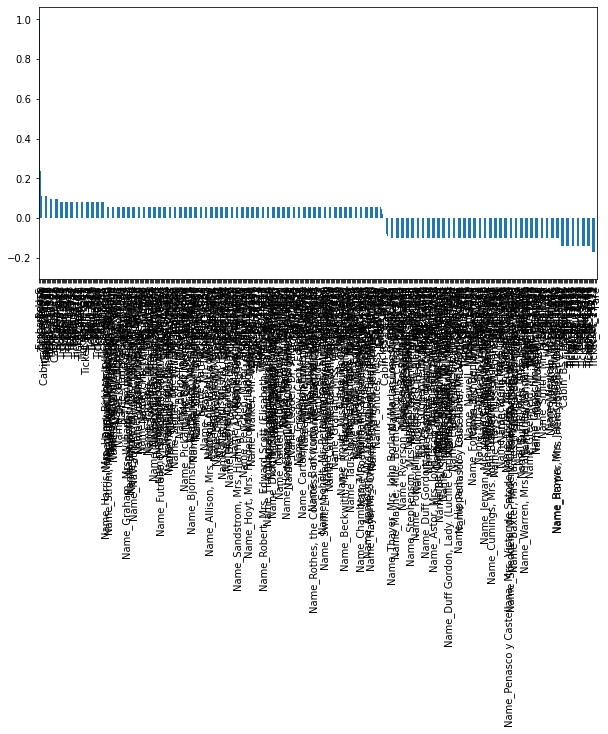

In [30]:
plt.figure(figsize=(10,5))
titanic.corr()['Embarked_S'].sort_values(ascending=False).plot(kind='bar')

In [ ]:
#normalization
#scaler=preprocessing.MinMaxScaler()
#minmax_df=scaler.fit_transform(x)
#x=pd.dataframe